In [1]:
import pandas as pan
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
horseData = pan.read_csv('horse.csv')

In [3]:
horseData.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
def convertSurgery(col):
    col = str(col) 
    if col.startswith('no'):
        return 1
    if col.startswith('yes'):
        return 2
    
def convertAge(col):
    col = str(col)
    if col.startswith('adult'):
        return 1
    if col.startswith('young'):
        return 2

def convertTempOfExtremities(col):
    col = str(col)
    if col.startswith('normal'):
        return 1
    if col.startswith('warm'):
        return 2
    if col.startswith('cool'):
        return 3
    if col.startswith('cold'):
        return 4

def convertPeripheralPulse(col):
    col = str(col)
    if col.startswith('normal'):
        return 1
    if col.startswith('increased'):
        return 2
    if col.startswith('reduced'):
        return 3
    if col.startswith('absent'):
        return 4
    
def convertMucousMembrane(col):
    col = str(col)
    if col.startswith('normal_pink'):
        return 1
    if col.startswith('bright_pink'):
        return 2
    if col.startswith('pale_pink'):
        return 3
    if col.startswith('pale_cyanotic'):
        return 4
    if col.startswith('bright_red'):
        return 5
    if col.startswith('dark_cyanotic'):
        return 6

def convertCapillaryRefillTime(col):
    col = str(col)
    if col.startswith('less_3_sec'):
        return 1
    if col.startswith('more_3_sec'):
        return 2
    
def convertPain(col):
    col = str(col)
    if col.startswith('alert'):
        return 1
    if col.startswith('depressed'):
        return 2
    if col.startswith('mild_pain'):
        return 3
    if col.startswith('severe_pain'):
        return 4
    if col.startswith('extreme_pain'):
        return 5
    
def convertPeristalsis(col):
    col = str(col)
    if col.startswith('hypermotile'):
        return 1
    if col.startswith('normal'):
        return 2
    if col.startswith('hypomotile'):
        return 3
    if col.startswith('absent'):
        return 4

def convertAbdominalDistension(col):
    col = str(col)
    if col.startswith('none'):
        return 1
    if col.startswith('slight'):
        return 2        
    if col.startswith('moderate'):
        return 3
    if col.startswith('severe'):
        return 4
    
def convertNasogastricTube(col):
    col = str(col)
    if col.startswith('none'):
        return 1 
    if col.startswith('slight'):
        return 2
    if col.startswith('significant'):
        return 3
    
def convertNasogastricReflux(col):
    col = str(col)
    if col.startswith('none'):
        return 1
    if col.startswith('more_1_liter'):
        return 2
    if col.startswith('less_1_liter'):
        return 3


def convertRectalExamFeces(col):
    col = str(col)
    if col.startswith('normal'):
        return 1
    if col.startswith('increased'):
        return 2 
    if col.startswith('decreased'):
        return 3 
    if col.startswith('absent'):
        return 4

def convertAbdomen(col):
    col = str(col)
    if col.startswith('normal'):
        return 1
    if col.startswith('other'):
        return 2
    if col.startswith('firm'):
        return 3
    if col.startswith('distend_small'):
        return 4
    if col.startswith('distend_large'):
        return 5

def convertOutcome(col):
    col = str(col)
    if col.startswith('lived'):
        return 1
    if col.startswith('died'):
        return 2
    if col.startswith('euthanized'):
        return 3

def convertSurgicalLesion(col):
    col = str(col)
    if col.startswith('yes'):
        return 1
    if col.startswith('no'):
        return 2
    
def convertCPData(col):
    col = str(col)
    if col.startswith('yes'):
        return 1 
    if col.startswith('no'):
        return 2  
    

In [5]:
horseData['surgery'] = horseData['surgery'].apply(convertSurgery)
horseData['age'] = horseData['age'].apply(convertAge)
horseData['temp_of_extremities'] = horseData['temp_of_extremities'].apply(convertTempOfExtremities)
horseData['peripheral_pulse'] = horseData['peripheral_pulse'].apply(convertPeripheralPulse)
horseData['mucous_membrane'] = horseData['mucous_membrane'].apply(convertMucousMembrane)
horseData['capillary_refill_time'] = horseData['capillary_refill_time'].apply(convertCapillaryRefillTime)
horseData['pain'] = horseData['pain'].apply(convertPain)
horseData['peristalsis'] = horseData['peristalsis'].apply(convertPeristalsis)
horseData['abdominal_distention'] = horseData['abdominal_distention'].apply(convertAbdominalDistension)
horseData['nasogastric_tube'] = horseData['nasogastric_tube'].apply(convertNasogastricTube)
horseData['nasogastric_reflux'] = horseData['nasogastric_reflux'].apply(convertNasogastricReflux)
horseData['rectal_exam_feces'] = horseData['rectal_exam_feces'].apply(convertRectalExamFeces)
horseData['abdomen'] = horseData['abdomen'].apply(convertAbdomen)
horseData['outcome'] = horseData['outcome'].apply(convertOutcome)
horseData['surgical_lesion'] = horseData['surgical_lesion'].apply(convertSurgicalLesion)
horseData['cp_data'] = horseData['cp_data'].apply(convertCPData)

horseData = horseData.drop('hospital_number', axis=1)
horseData = horseData.drop('nasogastric_reflux_ph', axis=1)
horseData = horseData.drop('abdomo_appearance', axis=1)
horseData = horseData.drop('abdomo_protein', axis=1)
horseData = horseData.drop('cp_data', axis=1)
horseData = horseData.drop('lesion_1', axis=1)
horseData = horseData.drop('lesion_2', axis=1)
horseData = horseData.drop('lesion_3', axis=1)

horseData = horseData.fillna(-1)


In [6]:
horseData.head(20)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion
0,1,1,38.5,66.0,28.0,3.0,3.0,-1.0,2.0,5.0,4.0,4.0,-1.0,-1.0,3.0,5.0,45.0,8.4,2,2
1,2,1,39.2,88.0,20.0,-1.0,-1.0,4.0,1.0,3.0,4.0,2.0,-1.0,-1.0,4.0,2.0,50.0,85.0,3,2
2,1,1,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,-1.0,-1.0,1.0,1.0,33.0,6.7,1,2
3,2,2,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,1.0,3.0,3.0,-1.0,48.0,7.2,2,1
4,1,1,37.3,104.0,35.0,-1.0,-1.0,6.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,74.0,7.4,2,2
5,1,1,-1.0,-1.0,-1.0,2.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,-1.0,-1.0,1,2
6,2,1,37.9,48.0,16.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,3.0,5.0,37.0,7.0,1,1
7,2,1,-1.0,60.0,-1.0,3.0,-1.0,-1.0,1.0,-1.0,4.0,2.0,2.0,1.0,3.0,4.0,44.0,8.3,2,1
8,1,1,-1.0,80.0,36.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0,2.0,1.0,3.0,5.0,38.0,6.2,3,1
9,1,2,38.3,90.0,-1.0,1.0,-1.0,1.0,1.0,5.0,3.0,1.0,2.0,1.0,3.0,-1.0,40.0,6.2,1,2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(horseData.drop('outcome', axis = 1), horseData['outcome'], test_size=0.2, shuffle = True)

In [8]:
premenna = np_utils.to_categorical(y_train) 

In [9]:
model = Sequential()

model.add(Dense(23, input_dim = 19, activation='relu'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(4, activation = 'relu'))

model.compile(loss='mean_squared_error', optimizer = 'Nadam', metrics=['accuracy'])

In [10]:
return_fit = model.fit(X_train, premenna,  epochs = 100)

Epoch 1/100
239/239 [==============================] - 0s 1ms/step - loss: 0.2871 - acc: 0.3515
Epoch 2/100
239/239 [==============================] - 0s 67us/step - loss: 0.1700 - acc: 0.5230
Epoch 3/100
239/239 [==============================] - 0s 55us/step - loss: 0.1493 - acc: 0.6151
Epoch 4/100
239/239 [==============================] - 0s 109us/step - loss: 0.1422 - acc: 0.6067
Epoch 5/100
239/239 [==============================] - 0s 87us/step - loss: 0.1382 - acc: 0.6192
Epoch 6/100
239/239 [==============================] - 0s 79us/step - loss: 0.1359 - acc: 0.6067
Epoch 7/100
239/239 [==============================] - 0s 66us/step - loss: 0.1318 - acc: 0.6234
Epoch 8/100
239/239 [==============================] - 0s 54us/step - loss: 0.1283 - acc: 0.6318
Epoch 9/100
239/239 [==============================] - 0s 66us/step - loss: 0.1246 - acc: 0.6527
Epoch 10/100
239/239 [==============================] - 0s 70us/step - loss: 0.1228 - acc: 0.6527
Epoch 11/100
239/239 [=======

239/239 [==============================] - 0s 67us/step - loss: 0.0733 - acc: 0.7950
Epoch 85/100
239/239 [==============================] - 0s 71us/step - loss: 0.0727 - acc: 0.8117
Epoch 86/100
239/239 [==============================] - 0s 63us/step - loss: 0.0737 - acc: 0.7950
Epoch 87/100
239/239 [==============================] - 0s 62us/step - loss: 0.0726 - acc: 0.8075
Epoch 88/100
239/239 [==============================] - 0s 86us/step - loss: 0.0728 - acc: 0.8033
Epoch 89/100
239/239 [==============================] - 0s 81us/step - loss: 0.0720 - acc: 0.8075
Epoch 90/100
239/239 [==============================] - 0s 72us/step - loss: 0.0708 - acc: 0.8117
Epoch 91/100
239/239 [==============================] - 0s 76us/step - loss: 0.0730 - acc: 0.7908
Epoch 92/100
239/239 [==============================] - 0s 72us/step - loss: 0.0707 - acc: 0.8075
Epoch 93/100
239/239 [==============================] - 0s 85us/step - loss: 0.0703 - acc: 0.7992
Epoch 94/100
239/239 [===========

In [11]:
scores = model.evaluate(X_train, premenna)

print("\nAccuracy: %.2f%%" % (scores[1]*100))

239/239 [==============================] - 0s 219us/step

Accuracy: 82.43%


In [12]:
predikcia = model.predict_classes(X_test)
confusion_matrix(y_test, predikcia)

array([[32,  5,  2],
       [ 0, 15,  0],
       [ 4,  0,  2]])

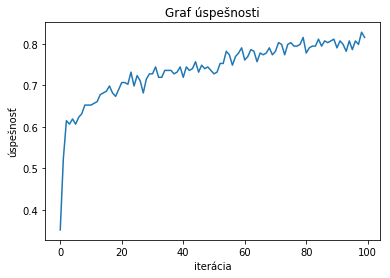

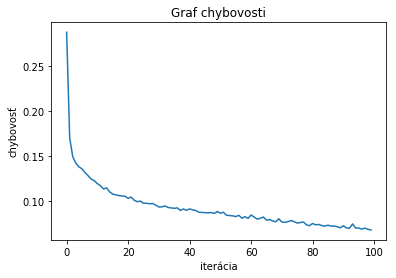

In [13]:
plt.plot(return_fit.history['acc'])
plt.title('Graf úspešnosti')
plt.ylabel('úspešnosť')
plt.xlabel('iterácia')
plt.show()


plt.plot(return_fit.history['loss'])
plt.title('Graf chybovosti')
plt.ylabel('chybovosť')
plt.xlabel('iterácia')
plt.show()